In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 創建到達率表格
arrival_rates = np.array([
    [0.1] * 30,
    [0.7] * 30,
    [0.1] * 30,
    [0.1] * 30
])

In [3]:
# 定義參數
seat_type = ['Y', 'M', 'K', 'YM', 'YK', 'MK', 'YMK'] # 座位種類
seats = 10 # 狀態 x 的座位數
lamda = 0.9 # lamda
time_space = len(arrival_rates[0]) # 時間長度
print(time_space)

30


In [4]:
# 座位選擇機率矩陣
PS = {
    'f': {'PY(S)': 0.0, 'PM(S)': 0.0, 'PK(S)': 0.0, 'P0(S)': 1.0, 'Q(S)': 0.0, 'R(S)': 0.0},
    'Y': {'PY(S)': 0.3, 'PM(S)': 0.0, 'PK(S)': 0.0, 'P0(S)': 0.7, 'Q(S)': 0.3, 'R(S)': 240.0},
    'M': {'PY(S)': 0.0, 'PM(S)': 0.6, 'PK(S)': 0.0, 'P0(S)': 0.4, 'Q(S)': 0.6, 'R(S)': 300.0},
    'K': {'PY(S)': 0.0, 'PM(S)': 0.0, 'PK(S)': 0.5, 'P0(S)': 0.5, 'Q(S)': 0.5, 'R(S)': 225.0},
    'YM': {'PY(S)': 0.1, 'PM(S)': 0.6, 'PK(S)': 0.0, 'P0(S)': 0.3, 'Q(S)': 0.7, 'R(S)': 380.0},
    'YK': {'PY(S)': 0.3, 'PM(S)': 0.0, 'PK(S)': 0.5, 'P0(S)': 0.2, 'Q(S)': 0.8, 'R(S)': 465.0},
    'MK': {'PY(S)': 0.0, 'PM(S)': 0.4, 'PK(S)': 0.5, 'P0(S)': 0.1, 'Q(S)': 0.9, 'R(S)': 425.0},
    'YMK': {'PY(S)': 0.1, 'PM(S)': 0.4, 'PK(S)': 0.5, 'P0(S)': 0.0, 'Q(S)': 1.0, 'R(S)': 505.0}
}

In [5]:
# 各個組合座位的 p_j 值
p_j = {
    'f': {'f': 0.0, 'Y': 0.0, 'M': 0.0, 'K': 0.0},
    'Y': {'f': 0.0, 'Y': 800, 'M': 0.0, 'K': 0.0},
    'M': {'f': 0.0, 'Y': 0.0, 'M': 500, 'K': 0.0},
    'K': {'f': 0.0, 'Y': 0.0, 'M': 0.0, 'K': 450},
    'YM': {'f': 0.0, 'Y': 800, 'M': 500, 'K': 0.0},
    'YK': {'f': 0.0, 'Y': 800, 'M': 0.0, 'K': 450},
    'MK': {'f': 0.0, 'Y': 0.0, 'M': 500, 'K': 450},
    'YMK': {'f': 0.0, 'Y': 800, 'M': 500, 'K': 450}
}

In [6]:
# 創建一個空字典保存三個第三維度的陣列
three_dimensional_dict = {}
for seat in seat_type:
    three_dimensional_dict[seat] = np.zeros((seats+1, time_space+1))

In [7]:
# 創建 value function 矩陣
value_function = np.zeros((seats+1, time_space+1))

In [8]:
'''定義價值函數的判斷式'''
def calculate_value_function(arrival_rates, p_j, seat_type, lamda, PS):
    
    # 創建 value function 矩陣
    value_function = np.zeros((seats+1, time_space+1))
    
    # 用於記錄每個價值函數對應的最大座位類型
    max_value_seat_types = np.empty((seats+1, time_space+1), dtype=object)
        
    # 每個時間點
    for t in range(1, time_space+1):

        # 每個狀態
        for x in range(seats+1):
            
            # 每一種座位組合
            for seat in seat_type:
                
                # 座位 = 0 或時間 = 0
                if x == 0 or t == 0:  
                    value_function[x, t] = 0
                
                # 其他情況
                else:
                    j_y = lamda*PS[seat]['PY(S)']*(p_j[seat]['Y']+value_function[x-1, t-1])
                    j_m = lamda*PS[seat]['PM(S)']*(p_j[seat]['M']+value_function[x-1, t-1])
                    j_k = lamda*PS[seat]['PK(S)']*(p_j[seat]['K']+value_function[x-1, t-1])
                    j_0 = (lamda*PS[seat]['P0(S)']+1-lamda)*value_function[x, t-1]

                    # 計算價值函數
                    three_dimensional_dict[seat][x,t] = j_y + j_m + j_k + j_0
                    
                    # 更新價值函數 table
                    if three_dimensional_dict[seat][x,t]> value_function[x, t]:
                        value_function[x, t] = three_dimensional_dict[seat][x,t]
                        max_value_seat_types[x, t] = seat  # 更新最大價值對應的座位
                    
    return three_dimensional_dict, value_function, max_value_seat_types

In [9]:
'''計算價值函數'''
three_dimensional_dict, value_function, max_value_seat_types = calculate_value_function(arrival_rates, p_j, seat_type, lamda, PS)
# print('three_dimensional_dict Y: \n', three_dimensional_dict['Y'])
# print('three_dimensional_dict M: \n', three_dimensional_dict['M'])
# print('three_dimensional_dict K: \n', three_dimensional_dict['K'])
# print('three_dimensional_dict YM: \n', three_dimensional_dict['YM'])
# print('three_dimensional_dict YK: \n', three_dimensional_dict['YK'])
# print('three_dimensional_dict MK: \n', three_dimensional_dict['MK'])
# print('three_dimensional_dict YMK: \n', three_dimensional_dict['YMK'])
# print('value function: \n', value_function)
print('max value seat types: \n', max_value_seat_types)

max value seat types: 
 [[None None None None None None None None None None None None None None
  None None None None None None None None None None None None None None
  None None None]
 [None 'YMK' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
  'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']
 [None 'YMK' 'YMK' 'YK' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
  'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']
 [None 'YMK' 'YMK' 'YMK' 'YK' 'YK' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
  'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']
 [None 'YMK' 'YMK' 'YMK' 'YMK' 'YK' 'YK' 'YK' 'YK' 'Y' 'Y' 'Y' 'Y' 'Y'
  'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']
 [None 'YMK' 'YMK' 'YMK' 'YMK' 'YMK' 'YK' 'YK' 'YK' 'YK' 'YK' 'Y' 'Y' 'Y'
  'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']
 [None 'YMK' 'YMK' 'YMK' 'YMK' 'YMK' 'YMK' 'YMK' 'YK' 'YK' 'YK' 'YK' 'YK'
  'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y

In [10]:
'''定義計算 Delta V_t(x) 的函式'''
def calculate_delta_value_function(value_function):
    
    # 初始化 Delta V 函數矩陣
    delta_value_function = np.zeros((len(value_function), len(value_function[0])))
    time_space = len(value_function[0])+1
    
    # 計算每個時間點下每個狀態的 Delta V 函數
    for t in range(1, time_space): 
        for x in range(1, len(value_function)):
            
            # 計算 Delta V_t(x)
            delta_value_function[x][t-1] = value_function[x][t-1] - value_function[x-1][t-1]
    
    return delta_value_function

In [11]:
# 計算 Delta V 函數
delta_value_function = calculate_delta_value_function(value_function)
print("Delta V: \n", delta_value_function)

Delta V: 
 [[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.         454.5        547.785      615.88305    665.5946265
  701.88407734 728.37537646 747.71402482 761.83123812 772.13680383
  779.65986679 785.15170276 789.16074301 792.0873424  794.22375995
  795.78334476 796.92184168 797.75294443 798.35964943 798.80254408
  799.12585718 799.36187574 799.53416929 799.65994358 799.75175882
  799.81878394 799.86771227 799.90342996 799.92950387 799.94853783
  799.96243261]
 [  0.           0.         361.215      451.54215    495.914193
  541.72791005 584.97007522 623.68950655 657.17612648 685.43300662
  708.84303187 727.9635773  743.40437117 755.75859157 765.56735429
  7

In [12]:
'''根據機率分布產生顧客'''
def generate_customer(customers, willing_to_pay):
    
    # 生成隨機亂數
    random_number = np.random.rand()
    probabilities = [0.1, 0.3, 0.3, 0.3]

    # 使用累積機率決定顧客種類
    cumulative_probability = 0
    customer_index = 0
    for probability in probabilities:
        cumulative_probability += probability
        if random_number <= cumulative_probability:
            break
        customer_index += 1
    
    # 回傳顧客種類
    customer_type = customers[customer_index]
    price = willing_to_pay[customer_index]    
    print(f"random_number: {random_number}, customer_index: {customer_index}, customer_type: {customer_type}, price: {price}")
    return customer_type, price

In [13]:
'''使用 DP 模擬'''
total_income_list = []  # 用來存總收益的 list
customers = {0: 'f', 1: 'Y', 2: 'M', 3: 'K'} # 顧客種類
willing_to_pay = [0, 800, 500, 450] # 願支付價格

# 模擬 300 次
for sim_time in range(300):
    
    total_income = 0  # 初始總收入為 0
    remaining_seats = 10  # 初始座位數量為 10
    time_space = len(arrival_rates[0])+1 # 時間為1~30
    
    # 每次模擬的過程
    for time_point in range(1, time_space):
        
        print("-------------" ,time_point, "-----------------")
        
        # 生成顧客
        customer_type, price = generate_customer(customers, willing_to_pay)

        # 若還有剩餘座位
        if remaining_seats > 0:
            
            seat_open = max_value_seat_types[remaining_seats][32-time_point-1]
            print(f"seat open: {seat_open}, customer_type: {customer_type}, Willingness to pay: {price}")
            
            delta_v = delta_value_function[remaining_seats][32-time_point-1]
            print(f"remaining seats: {remaining_seats}, time_point: {32-time_point-1}, delta_v: {delta_v}")
            
            # 座位符合顧客種類
            if p_j[seat_open][customer_type] > 0 :
               
                # 根據 Delta V 函數決定是否賣出座位
                if delta_v < price:

                    remaining_seats -= 1
                    total_income += price        
            
            else:
                print("No suitable seat to sell.")
        else:
            print("No remaining seats.")

        print(f"Remaining Seats: {remaining_seats}, Total Income: {total_income}")
        
    total_income_list.append(total_income)

------------- 1 -----------------
random_number: 0.9855332423362798, customer_index: 3, customer_type: K, price: 450
seat open: Y, customer_type: K, Willingness to pay: 450
remaining seats: 10, time_point: 30, delta_v: 524.4361897350627
No suitable seat to sell.
Remaining Seats: 10, Total Income: 0
------------- 2 -----------------
random_number: 0.8691485826089916, customer_index: 3, customer_type: K, price: 450
seat open: Y, customer_type: K, Willingness to pay: 450
remaining seats: 10, time_point: 29, delta_v: 511.8107833659651
No suitable seat to sell.
Remaining Seats: 10, Total Income: 0
------------- 3 -----------------
random_number: 0.01789569322781559, customer_index: 0, customer_type: f, price: 0
seat open: Y, customer_type: f, Willingness to pay: 0
remaining seats: 10, time_point: 28, delta_v: 500.18487108693716
No suitable seat to sell.
Remaining Seats: 10, Total Income: 0
------------- 4 -----------------
random_number: 0.9837217294493911, customer_index: 3, customer_type:

In [19]:
average_income = np.mean(total_income_list)
print(f"Average Income after {sim_time+1} simulation:", average_income)

Average Income after 300 simulation: 7332.333333333333


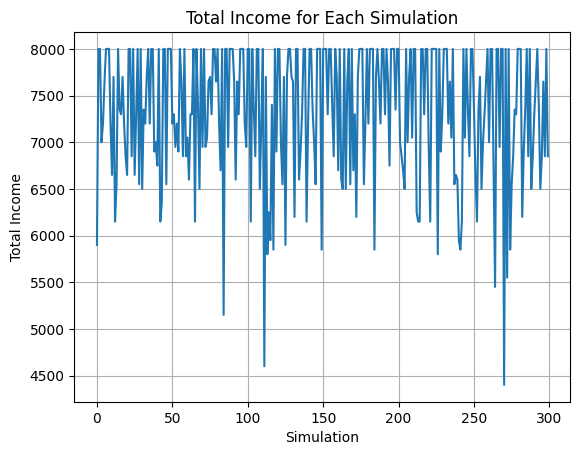

In [14]:
# 繪製折線圖
plt.plot(total_income_list, linestyle='-')
plt.title('Total Income for Each Simulation')
plt.xlabel('Simulation')
plt.ylabel('Total Income')
plt.grid(True)
plt.show()

In [16]:
'''使用 FCFS 模擬'''
total_income_list_fcfs = []  # 用來存總收益的 list

# 模擬 300 次
for sim_time in range(300):
    
    total_income = 0  # 初始總收入為 0
    remaining_seats = seats  # 初始座位數量
    
    # 每次模擬的過程
    for time_point in range(1, time_space+1):
        
        print("-------------" ,time_point, "-----------------")
        
        # 生成顧客
        customer_type, price = generate_customer(customers, willing_to_pay)

        # 若還有剩餘座位
        if remaining_seats > 0:
            
            remaining_seats -= 1
            total_income += price        
            
        else:
            print("No remaining seats.")

        print(f"Total Income: {total_income}")
        
    total_income_list_fcfs.append(total_income)

------------- 1 -----------------
random_number: 0.3975456660656501, customer_index: 1, customer_type: Y, price: 800
Total Income: 800
------------- 2 -----------------
random_number: 0.8987212312406931, customer_index: 3, customer_type: K, price: 450
Total Income: 1250
------------- 3 -----------------
random_number: 0.041723126803013155, customer_index: 0, customer_type: f, price: 0
Total Income: 1250
------------- 4 -----------------
random_number: 0.060227203316786104, customer_index: 0, customer_type: f, price: 0
Total Income: 1250
------------- 5 -----------------
random_number: 0.3706949628807362, customer_index: 1, customer_type: Y, price: 800
Total Income: 2050
------------- 6 -----------------
random_number: 0.7480019154024473, customer_index: 3, customer_type: K, price: 450
Total Income: 2500
------------- 7 -----------------
random_number: 0.668090579385225, customer_index: 2, customer_type: M, price: 500
Total Income: 3000
------------- 8 -----------------
random_number: 0

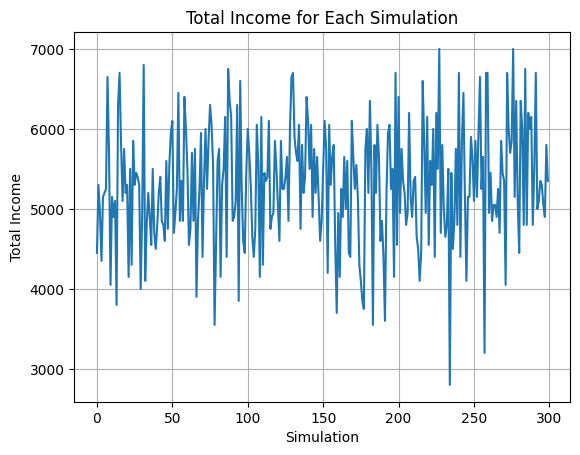

In [17]:
# 繪製折線圖
plt.plot(total_income_list_fcfs, linestyle='-')
plt.title('Total Income for Each Simulation')
plt.xlabel('Simulation')
plt.ylabel('Total Income')
plt.grid(True)
plt.show()

In [18]:
average_income_fcfs = np.mean(total_income_list_fcfs)
print(f"Average Income after {sim_time+1} simulation:", average_income_fcfs)

Average Income after 300 simulation: 5297.666666666667


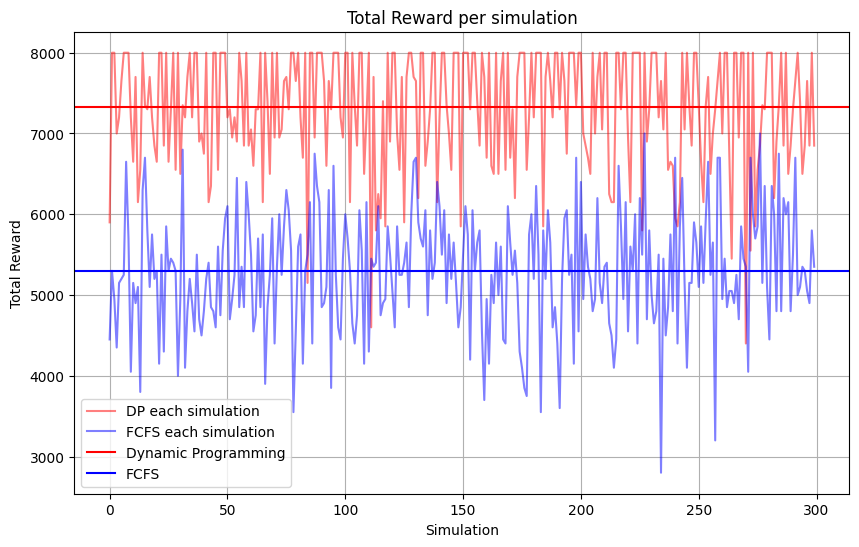

In [22]:
# 繪製圖表
plt.figure(figsize=(10, 6))  
plt.plot(range(300), total_income_list, label='DP each simulation', alpha=0.5, color='r')
plt.plot(range(300), total_income_list_fcfs, label='FCFS each simulation', alpha=0.5, color='b')
plt.axhline(y=average_income, color='r', label='Dynamic Programming')
plt.axhline(y=average_income_fcfs, color='b', label='FCFS')
plt.xlabel('Simulation')
plt.ylabel('Total Reward')
plt.title('Total Reward per simulation')
plt.legend()  
plt.grid(True)
plt.show()